#Question 1

For a given Matrix $A$ and $B$ of dimension $n \times k$ and $k \times m$ respectively, we can write the matrises as follows:
<br>
$$ A = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1k}\\ 
a_{21} & a_{22} & \cdots & a_{2k}\\ 
\vdots & \vdots & \ddots &  \vdots\\ 
a_{n1} & a_{n2} & \cdots & a_{nk}
\end{bmatrix} \quad B = \begin{bmatrix}
b_{11} & b_{12} & \cdots & b_{1m}\\ 
b_{21} & b_{22} & \cdots & b_{2m}\\ 
\vdots & \vdots & \ddots &  \vdots\\ 
b_{k1} & b_{k2} & \cdots & b_{km}
\end{bmatrix}$$

When we multiply the matrices $A$ and $B$, we perform the following operations
<br>
$$A\cdot B = \begin{bmatrix}
\sum_{i=1}^{k}a_{1i}\cdot b_{i1} & \sum_{i=1}^{k}a_{1i}\cdot b_{i2} & \cdots & \sum_{i=1}^{k}a_{1i}\cdot b_{im}\\ 
\sum_{i=1}^{k}a_{2i}\cdot b_{i1} & \sum_{i=1}^{k}a_{2i}\cdot b_{i2} & \cdots & \sum_{i=1}^{k}a_{2i}\cdot b_{im}\\ 
\vdots & \vdots & \ddots &  \vdots\\ 
\sum_{i=1}^{k}a_{ni}\cdot b_{i1} & \sum_{i=1}^{k}a_{ni}\cdot b_{i2} & \cdots & \sum_{i=1}^{k}a_{ni}\cdot b_{im}
\end{bmatrix}$$

For computing each element in $A\times B$, $k$ many multiplications are being done. Now the matrix $A\times B$ consists of $n\times m$ elements. Therefore, in matrix multiplication, $nkm$ multiplications are done.
<br>
For computing each element in $A\times B$, $k-1$ many summations are being done. Now the matrix $A\times B$ consists of $n\times m$ elements. Therefore, in matrix multiplication, $nm(k-1)$ summations are done.

#Question 2

In [20]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

In [43]:
#Taking Matrix dimensions
n = int(input("Enter the number of rows in matrix A: "))
k = int(input("Enter the number of columns in matrix A: "))
m = int(input("Enter the number of columns in matrix B: "))

Enter the number of rows in matrix A: 4
Enter the number of columns in matrix A: 5
Enter the number of columns in matrix B: 6


In [44]:
#Implimenting Matrix multiplication using list of lists
def mat_mul(A,B):
  begin = time.time()
  R1 = []
  for i in range(len(A)):
    r = []
    for j in range(len(B[0])):
      r.append(0)
    R1.append(r)
  for i in range(len(A)):
    for j in range(len(B[0])):
      for l in range(len(B)):
        R1[i][j] += A[i][l] * B[l][j]
  end = time.time()

  return end - begin


In [45]:
#Implimenting Matrix multiplication using Numpy
def np_mat_mul(A,B):
  begin = time.time()
  R2 = np.dot(A,B)
  end = time.time()
  return end - begin


In [46]:
#Computing 100 matrx multiplications and checking the time taken
avg_imp = 0 #Time taken by list of list implimentation
avg_np = 0 #Time taken by numpy implementation
for i in range(100):
  A = np.random.randint(100, size=(n,k))
  B = np.random.randint(100, size=(k,m))
  avg_imp += mat_mul(A,B)
  avg_np += np_mat_mul(A,B)
avg_imp = avg_imp/100
avg_np = avg_np/100

In [49]:
avg_imp #Average time taken by list of list implementation

0.0002846646308898926

In [50]:
avg_np #Average time taken by numpy implementation

9.78708267211914e-06

In [51]:
k,m = 50, 75
x_axis, y_axis_imp, y_axis_np = [], [], []
for i in range(10,101):
  x_axis.append(i)
  avg_imp = 0
  avg_np = 0  
  for j in range(100):
    a = np.random.randint(100, size=(i,k))
    b = np.random.randint(100, size=(k,m))
    avg_imp += mat_mul(A,B)
    avg_np += np_mat_mul(A,B)
  avg_imp = avg_imp/100
  avg_np = avg_np/100
  y_axis_imp.append(avg_imp)
  y_axis_np.append(avg_np)

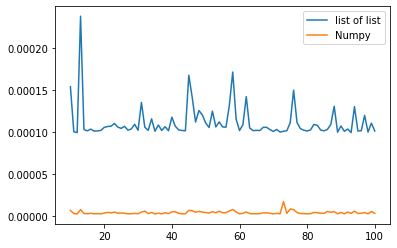

In [52]:
#To plot the change in time as the size of the matrix grows
fig, ax = plt.subplots()
ax.plot(x_axis, y_axis_imp, label="list of list")
ax.plot(x_axis, y_axis_np, label="Numpy")
leg = ax.legend(loc ="upper right")
fig.show()

#Question 3

If it takes one pass to find the highest element in the array, then it implies that it takes $n-1$ many comparisons.
<br>
After finding the largest element, we remove that element from the array and find the next largest element. As the new array has $n-1$ elements, it will take $n-2$ comparisons to find the $2nd$ highest element.
<br>
We need to find the $\frac{n}{2}$th highest element. If we continue the above procedure, then it will take following numbers of comparison:
$$(n-1) + (n-2) + \cdots + \left ( \frac{n}{2}-1\right ) = \frac{n(3n-2)}{8}$$
<br>
Therefore, it takes $O(n^2)$ time to find the median of the array.
<br><br>
Another approach will be sorting the array in $O(n\log n)$ time and return the $\frac{n}{2}$th value in the sorted array.

In [53]:
import numpy as np
import time

In [65]:
#Approach 1
def median_1(x):
  begin = time.time()
  for i in range(int(len(x)/2)+1):
    max = x[0]
    for j in x[1:]:
      if j > max:
        max = j
    x = np.delete(x, np.where(x == max))
  end = time.time()
  return max, end-begin

In [66]:
#Approach 2
def median_2(x):
  begin = time.time()
  y = np.sort(x)
  end = time.time()
  return y[int(len(x)/2)-1], end-begin

In [67]:
#Approach 3
def median_3(x):
  begin = time.time()
  med = np.median(x)
  end = time.time()
  return med, end-begin

In [68]:
T1, T2, T3 = 0, 0, 0
for i in range(100):
  x = np.random.uniform(low=0.0, high=1.0, size=(20,))
  m1, t1 = median_1(x)
  m2, t2 = median_2(x)
  m3, t3 = median_3(x)
  T1 += t1
  T2 += t2
  T3 += t3
T1 /= 100 #Time taken by 1st Approach
T2 /= 100 #TIme taken by 2nd Approach
T3 /= 100 #Time taken by 3rd Approach

In [69]:
T1, T2, T3

(0.00033492326736450195, 7.359981536865235e-06, 0.0001314425468444824)

In [70]:
x_axis, y_axis_1, y_axis_2, y_axis_3 = [], [], [], []
for i in range(10,101):
  x_axis.append(i)
  T1, T2, T3 = 0, 0, 0 
  for j in range(100):
    x = np.random.uniform(low=0.0, high=1.0, size=(i,))
    m1, t1 = median_1(x)
    m2, t2 = median_2(x)
    m3, t3 = median_3(x)
    T1 += t1
    T2 += t2
    T3 += t3
  y_axis_1.append(T1/100)
  y_axis_2.append(T2/100)
  y_axis_3.append(T3/100)

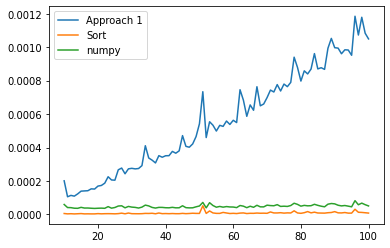

In [73]:
#To plot the change in time as the size of the array grows
fig, ax = plt.subplots()
ax.plot(x_axis, y_axis_1, label="Approach 1")
ax.plot(x_axis, y_axis_2, label="Sort")
ax.plot(x_axis, y_axis_3, label="numpy")
leg = ax.legend(loc ="upper left")
fig.show()

#Question 4

For the function $$f(x,y) = x^2y + y^3\sin(x)$$ The gradient is calculated as below:
<br>
$$\nabla f(x,y) = \left [ \frac{\delta f(x,y)}{\delta x}, \frac{\delta f(x,y)}{\delta y} \right ]  =\left [  2xy + y^3\cos(x), x^2+3y^2\sin(x) \right ]$$ 

#Question 5

In [ ]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
import random as rn

key = random.PRNGKey(0)

In [77]:
#Defining the function
def func(x,y):
  return x*x*y + y*y*y*jnp.sin(x)

In [78]:
#Defining the Gradient of the function
def grad_func(x,y):
  return [(2*x*y) + (y*y*y*jnp.cos(x)), (x*x)+(3*y*y*jnp.sin(x))]

In [79]:
#Generating Two random valued list for input
x = random.uniform(key, shape=(10,))
y = random.uniform(key, shape=(10,))

In [80]:
grad_jax = grad(func, (0,1))

In [81]:
#Calculating Gradient for 10 pairs of input
for i in range(10):
  g1 = grad_func(x[i],y[i])
  g2 = grad_jax(x[i], y[i])
  print(f"Gradient as per analytical solution: {g1[0].tolist(), g1[1].tolist()}")
  print(f"Gradient as per jax solution: {g2[0].tolist(), g2[1].tolist()}\n")
  

Gradient as per analytical solution: (0.2938324213027954, 0.257269024848938)
Gradient as per jax solution: (0.2938324213027954, 0.257269024848938)

Gradient as per analytical solution: (0.9116300344467163, 0.9872256517410278)
Gradient as per jax solution: (0.9116300344467163, 0.9872257709503174)

Gradient as per analytical solution: (0.43679311871528625, 0.41027069091796875)
Gradient as per jax solution: (0.43679308891296387, 0.41027069091796875)

Gradient as per analytical solution: (0.11830776184797287, 0.08965349197387695)
Gradient as per jax solution: (0.11830776184797287, 0.08965349197387695)

Gradient as per analytical solution: (0.2515691816806793, 0.21453708410263062)
Gradient as per jax solution: (0.25156915187835693, 0.21453708410263062)

Gradient as per analytical solution: (0.46322864294052124, 0.43981415033340454)
Gradient as per jax solution: (0.46322864294052124, 0.43981415033340454)

Gradient as per analytical solution: (0.1413169801235199, 0.10994172096252441)
Gradient

#Question 6

In [82]:
from sympy import diff, sin
from sympy.abc import x,y

In [83]:
func = x*x*y + y*y*y*sin(x)

In [84]:
grad = [diff(func, x), diff(func, y)]

In [85]:
print(grad)

[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]


#Question 7

In [86]:
Dict = {'2022': {"Branch 1": {"Roll Number 1": {"Name": "N1", "Marks": {"Maths": 100, "English": 70}}}, "Branch 2": {}}}

In [87]:
Dict

{'2022': {'Branch 1': {'Roll Number 1': {'Name': 'N1',
    'Marks': {'Maths': 100, 'English': 70}}},
  'Branch 2': {}}}

In [91]:
for i in range(5):
  year = input("Enter the year: ")
  if year not in Dict:
    Dict[year] = {"Branch 1": {}, "Branch 2": {}}
  else:
    branch = int(input("Enter Branch no.: "))
    if f"Branch {branch}" not in Dict[year]:
      Dict[year][f"Branch {branch}"] = {}
    else:
      roll = int(input("Enter Roll no.: "))
      if f"Roll Number {roll}" not in Dict[year][f"Branch {branch}"]:
        Dict[year][f"Branch {branch}"][f"Roll Number {roll}"] = {}
        name = input("Enter Name: ")
        Dict[year][f"Branch {branch}"][f"Roll Number {roll}"]["Name"] = name
        Dict[year][f"Branch {branch}"][f"Roll Number {roll}"]["Marks"] = {}
        n = int(input("Enter number of subjects to be added: "))
        for j in range(n):
          subject = input(f"Enter the subject {j+1}: ")
          marks = int(input(f"Enter marks in {subject}: "))
          Dict[year][f"Branch {branch}"][f"Roll Number {roll}"]["Marks"][subject] = marks
      else:
        subject = input("Enter the subject: ")
        if subject not in Dict[year][f"Branch {branch}"][f"Roll Number {roll}"]["Marks"]:
          marks = int(input(f"Enter marks in {subject}: "))
          Dict[year][f"Branch {branch}"][f"Roll Number {roll}"]["Marks"][subject] = marks
        else:
          print(Dict[year][f"Branch {branch}"][f"Roll Number {roll}"]["Marks"][subject])



Enter the year: 2022
Enter Branch no.: 1
Enter Roll no.: 1
Enter the subject: Maths
100
Enter the year: 2022
Enter Branch no.: 2
Enter Roll no.: 1
Enter the subject: Maths
90
Enter the year: 2024
Enter Branch no.: 1
Enter Roll no.: 1
Enter Name: N4
Enter number of subjects to be added: 2
Enter the subject 1: Maths
Enter marks in Maths: 90
Enter the subject 2: CS
Enter marks in CS: 100
Enter the year: 2025
Enter Branch no.: 1
Enter Roll no.: 1
Enter Name: N5
Enter number of subjects to be added: 1
Enter the subject 1: Maths
Enter marks in Maths: 99
Enter the year: 2027


#Question 8

In [389]:
class subject:
  def __init__(self, Subject_Name, marks):
    self.Subject_Name = Subject_Name
    self.marks = marks

class student:
  def __init__(self, Student_Name, roll):
    self.Student_Name = Student_Name
    self.roll = roll
    self.subjects = []

  def student_details(self):
    print(f"Roll number: {self.roll}")
    print(f"Name: {self.Student_Name}")
    if self.subjects == []:
      print("No subjects added")
    else:
      for i in self.subjects:
        print(f"Subject: {i.Subject_Name}, Marks: {i.marks}")

  def add_subject(self):
    Subject_Name = input("Enter the name of the subject: ")
    marks = int(input(f"Enter the marks in {Subject_Name}: "))
    self.subjects.append(subject(Subject_Name, marks))

class branch:
  def __init__(self, Branch_Name):
    self.Branch_Name = Branch_Name
    self.students = []

  def display_students(self):
    if self.students == []:
      print(f"No students added in {self.Branch_Name}")
    else:
      for i in self.students:
        print(f"Roll Number: {i.roll}, Name: {i.Student_Name}")

  def add_students(self):
    roll = input("Enter Student Roll number: ")
    Student_Name = input("Enter Student Name: ")
    self.students.append(student(Student_Name, roll))

class Year:
  def __init__(self, year):
    self.year = year
    self.branches = []

  def add_branch(self):
    branch_name = input("Enter Branch Name: ")
    self.branches.append(branch(branch_name))
  
  def display_branches(self):
    if self.branches == []:
      print("No branches added")
    else:
      for i in self.branches:
        print(i.Branch_Name)
  


In [391]:
#To create a year
def session():
  k = int(input("Enter the year: "))
  y = Year(k)
  return y

#To add branch
def branch_add(y):
  y.add_branch()

#To display branches in a year
def branch_display(y):
  y.display_branches()

#To add students in a branch
def student_add(y):
  branch_no = int(input("Enter Branch no.: "))
  if y.branches == []:
    print("No such branch")
    print("Try adding branch")
  else:
    y.branches[branch_no-1].add_students()

#To display students in a branch
def students_display(y):
  branch_no = int(input("Enter Branch no.: "))
  if y.branches == []:
    print("No such branch")
    print("Try adding branch")
  else:
    y.branches[branch_no-1].display_students()

#To display Student details
def detail_student(y):
  branch_no = int(input("Enter Branch no.: "))
  roll = int(input("Enter Roll number of student: "))
  if y.branches == []:
    print("No such branch")
    print("Try adding branch")
  elif y.branches[branch_no-1].students == []:
    print("No such student")
    print("Try adding Student")
  else:
    y.branches[branch_no-1].students[roll-1].student_details()

#To Add a subject
def subject_add(y):
  branch_no = int(input("Enter Branch no.: "))
  roll = int(input("Enter Roll number of student: "))
  if y.branches == []:
    print("No such branch")
    print("Try adding branch")
  elif y.branches[branch_no-1].students == []:
    print("No such student")
    print("Try adding Student")
  else:
    y.branches[branch_no-1].students[roll-1].add_subject()

In [392]:
y1 = session()

Enter the year: 2022


In [394]:
branch_add(y1)

Enter Branch Name: 2


In [395]:
branch_display(y1)

1
2


In [397]:
student_add(y1)

Enter Branch no.: 2
Enter Student Roll number: 1
Enter Student Name: N2


In [398]:
students_display(y1)

Enter Branch no.: 1
Roll Number: 1, Name: N1


In [401]:
detail_student(y1)

Enter Branch no.: 1
Enter Roll number of student: 1
Roll number: 1
Name: N1
Subject: Maths, Marks: 100


In [400]:
subject_add(y1)

Enter Branch no.: 1
Enter Roll number of student: 1
Enter the name of the subject: Maths
Enter the marks in Maths: 100


#Question 9

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [93]:
x = np.arange(0.5, 100.5, 0.5)

In [94]:
def f1(x):
  return x
def f2(x):
  return x*x
def f3(x):
  return (x*x*x)/100
def f4(x):
  return np.sin(x)
def f5(x):
  return np.sin(x)/x
def f6(x):
  return np.log(x)
def f7(x):
  return np.exp(x)

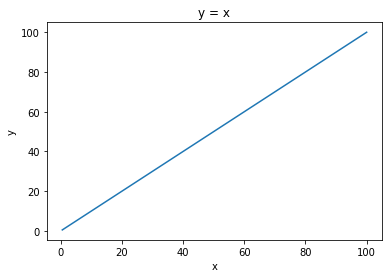

In [95]:
plt.plot(x, f1(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x')
plt.show()

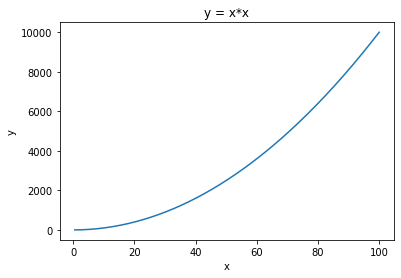

In [96]:
plt.plot(x, f2(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x*x')
plt.show()

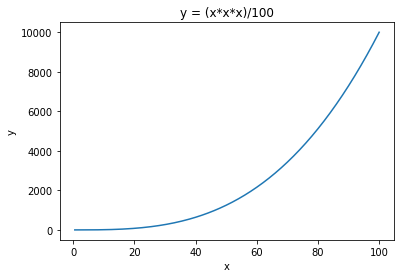

In [97]:
plt.plot(x, f3(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = (x*x*x)/100')
plt.show()

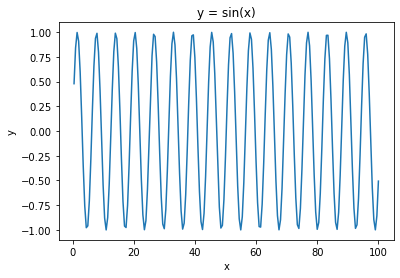

In [98]:
plt.plot(x, f4(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = sin(x)')
plt.show()

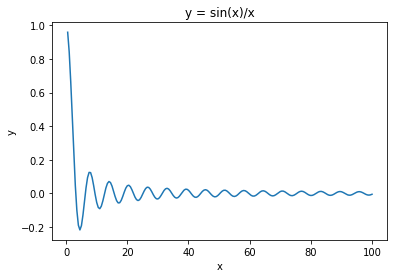

In [99]:
plt.plot(x, f5(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = sin(x)/x')
plt.show()

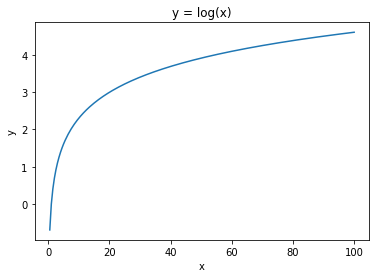

In [100]:
plt.plot(x, f6(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = log(x)')
plt.show()

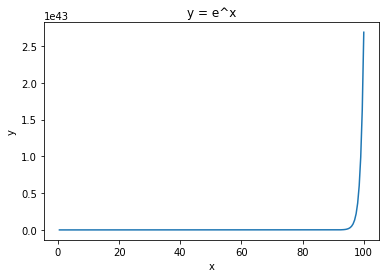

In [101]:
plt.plot(x, f7(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = e^x')
plt.show()

#Question 10 and 11

**Question 10**

In [102]:
import numpy as np
import pandas as pd

In [103]:
X = np.random.uniform(low=1.0, high=2.0, size=(20,5))

In [104]:
col_names = ["a", "b", "c", "d", "e"]
X_df = pd.DataFrame(data=X, columns = col_names)

In [105]:
X_df.std().idxmax() #Column with Maximum Standard Deviation

'd'

In [106]:
X_df.mean(axis=1).idxmin() #Note that the row index start with 0
  

19

**Question 11**

In [107]:
X_df["f"] = X_df.sum(axis=1)

In [108]:
X_df["g"] = ["LT8" if i<8 else "GT8" for i in X_df.f]

In [109]:
X_df

,a,b,c,d,e,f,g
0,1.551273,1.688560,1.769243,1.781605,1.306703,8.097384,GT8
1,1.975275,1.178672,1.379322,1.449241,1.649857,7.632366,LT8
2,1.268785,1.809571,1.530693,1.712834,1.116569,7.438452,LT8
3,1.916210,1.824479,1.350083,1.924362,1.823339,8.838474,GT8
4,1.053875,1.336696,1.729616,1.932880,1.368759,7.421827,LT8
5,1.217550,1.118018,1.052198,1.758114,1.396612,6.542492,LT8
6,1.337006,1.609086,1.416947,1.905394,1.697144,7.965578,LT8
7,1.704730,1.345722,1.611037,1.138737,1.713534,7.513759,LT8
8,1.972764,1.235081,1.425899,1.811902,1.386386,7.832032,LT8
9,1.342179,1.118991,1.467574,1.052371,1.837203,6.818317,LT8


In [110]:
X_df.f.where(X_df.g == 'LT8').dropna()

1     7.632366
2     7.438452
4     7.421827
5     6.542492
6     7.965578
7     7.513759
8     7.832032
9     6.818317
10    7.927472
11    7.549487
12    7.505647
13    7.520669
14    7.103771
15    7.276928
16    6.875786
18    7.345804
19    6.476440
Name: f, dtype: float64

In [111]:
X_df.f.where(X_df.g == 'GT8').dropna()

0     8.097384
3     8.838474
17    8.671578
Name: f, dtype: float64

In [112]:
#Alternate Method
LT = []
GT = []
for i,e in enumerate(X_df.g):
  if e == "LT8":
    LT.append(i)
  else:
    GT.append(i)
print("Rows in 'f' where 'g' has 'LT8': ",LT)
print("Rows in 'f' where 'g' has 'GT8': ",GT)

Rows in 'f' where 'g' has 'LT8':  [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19]
Rows in 'f' where 'g' has 'GT8':  [0, 3, 17]


In [113]:
X_df.f.where(X_df.g == 'LT8').dropna().std()

0.44326514880077617

In [114]:
X_df.f.where(X_df.g == 'GT8').dropna().std()

0.38875191749079013

#Question 12

Broadcasting is the way numpy handles arrays of different dimension during certain operations. In general, the smaller array is broadcasted to match the dimension of the larger array. For example:

In [115]:
import numpy as np

In [116]:
a = np.array([1, 2, 3, 4])
b = np.array([2])
c = a*b
print(c)

[2 4 6 8]


In the above example, we see that, the dimension of array $a$ is $4\times 1$ and the dimension of array $b$ is $1$. Array $b$ acts as a scalar in this scenario. The array is stretched to match the dimension of array $a$ in the following manner:
$$[2] → [2,2,2,2]$$
<br>
The resultant array is then pointwise multiplied with $a$. If the operation is additon, pointwise addition takes place.

In [117]:
a = np.array([1, 2, 3, 4])
b = np.array([2])
c = a+b
print(c)

[3 4 5 6]


Operation between two array is possible if the following condition for their dimension(element wise) satisfies:


1.   The dimensions are matching
2.   One of them is 1

Another examples is as follows:

In [118]:
A = np.random.uniform(0.0, 1.0, size=(256,256,3))
B = np.random.uniform(1,10, size=(3,))
Result = A*B
print(A.shape)

(256, 256, 3)


In the above example, the $3D$ matrix $A$ is of dimension $256\times256\times3$. It can be interpreted as an image of $256\times256$ resolution and each pixel has $3$ values corresponding to $red, green, blue$. 
For the aray $B$, the dimension is $3$ or it can also be written as $1\times1\times3$. When the array $B$ is multiplied with $A$, it is stretched to match the the dimension of $A$.

#Question 13

In [119]:
import numpy as np
import math

In [120]:
#Function to flatten the array
output = []
def reemovNestings(l):
    for i in l:
        if type(i) == np.ndarray:
            reemovNestings(i)
        else:
            output.append(i)

In [121]:
#Function to find the index of minimum
def custom_argmin(X):
  reemovNestings(X)
  min = math.inf
  min_idx = 10000000000
  for i,m in enumerate(output):
    if m<min:
      min = m
      min_idx = i
  l = min_idx
  k = list(X.shape[1:])
  co = []
  while k!=[]:
    c1 = math.ceil(l/math.prod(k))
    l = l - (c1-1)*math.prod(k)
    co.append(c1-1)
    if len(k) == 1:
      co.append(math.floor(l%k[0])-1)
      break
    k.pop(0)

  return co, min_idx

In [122]:
X = np.random.uniform(low=1.0, high=2.0, size=(6,5,7,9))

In [123]:
#Custom Argmin
position, index = custom_argmin(X)
print("The position at which the minimum is present is ",position)
print("The index is ",index)

The position at which the minimum is present is  [4, 3, 4, 0]
The index is  1486


In [124]:
#Numpy Argmin
np.argmin(X)

1486